# Visualization for Delegation Based Lock

In [2]:
@time using DataFrames, CSV, StatsPlots

bench = @time CSV.read("output/output.csv", DataFrame);


  1.720639 seconds (1.61 M allocations: 96.855 MiB, 3.92% gc time)


  0.937372 seconds (681.66 k allocations: 45.661 MiB, 1.75% gc time, 99.69% compilation time: 74% of which was recompilation)


  0.197769 seconds (338.78 k allocations: 18.415 MiB, 99.12% compilation time)


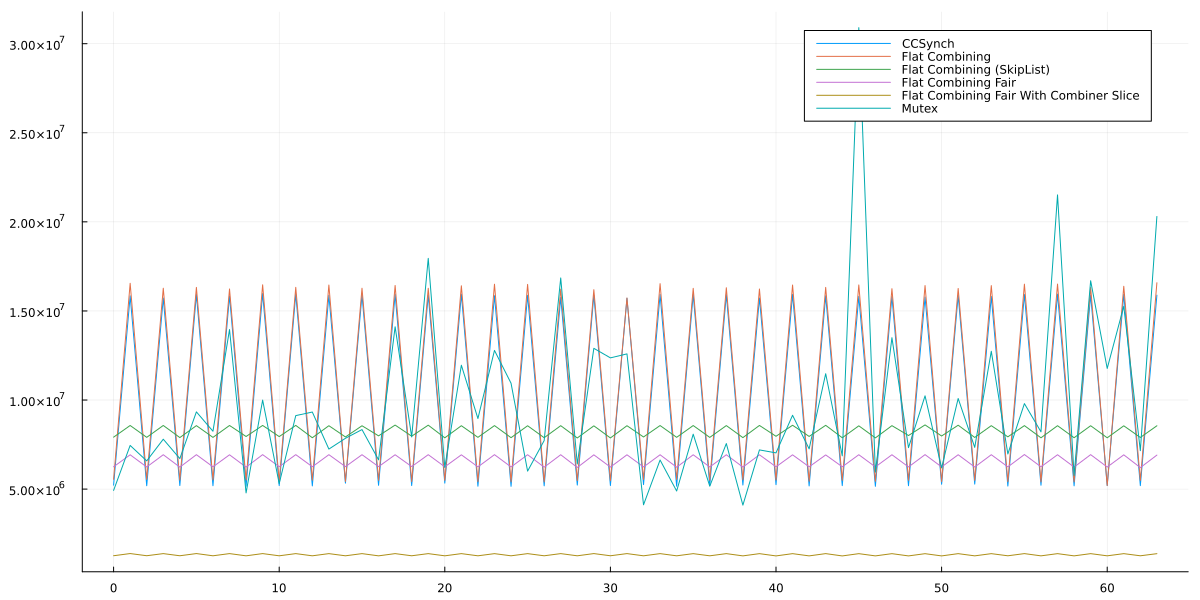

In [41]:
using StatsPlots, Query

loop_comparison = @time begin
    bench |>
        @filter(_.ThreadNum == 64) |>
        @df plot(:Id, :LoopCount, group=:Locktype, size=(1200,600))
end
    
savefig(loop_comparison, "graphs/loop_comparison.svg")
loop_comparison

In [5]:
bench

Row,Id,CpuId,ThreadNum,CpuNum,LoopCount,NumAcquire,HoldTime,CombineTime,Locktype
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64?,String
1,0,0,64,64,7915328,13800,139,481319481,Flat Combining (SkipList)
2,1,1,64,64,8570309,4981,150,missing,Flat Combining (SkipList)
3,2,2,64,64,7904737,13775,138,240661174,Flat Combining (SkipList)
4,3,3,64,64,8571471,4979,150,721826541,Flat Combining (SkipList)
5,4,4,64,64,7892053,13754,138,missing,Flat Combining (SkipList)
6,5,5,64,64,8562477,4978,150,240592272,Flat Combining (SkipList)
7,6,6,64,64,7902435,13775,138,missing,Flat Combining (SkipList)
8,7,7,64,64,8570957,4980,150,missing,Flat Combining (SkipList)
9,8,8,64,64,7952026,13861,139,240541464,Flat Combining (SkipList)


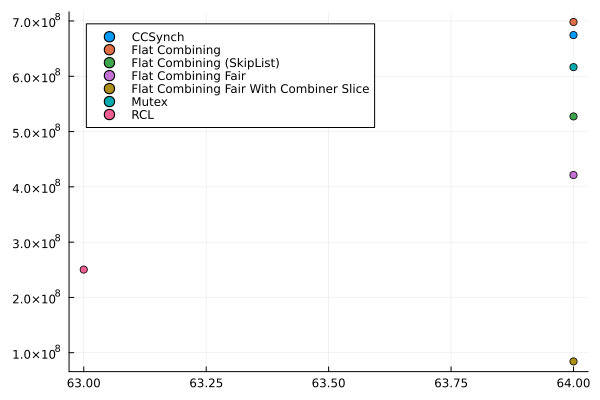

In [45]:
using Query, StatsPlots

bench2 = bench |>
    @groupby((_.ThreadNum, _.Locktype)) |>
    @map({ThreadNum = key(_)[1], Locktype = key(_)[2], LoopCount = sum(_.LoopCount)}) |>
    DataFrame


@df bench2 plot(:ThreadNum, :LoopCount, group=:Locktype)

  1.796123 seconds (2.36 M allocations: 147.304 MiB, 3.00% gc time, 99.62% compilation time: 14% of which was recompilation)


  0.277777 seconds (266.49 k allocations: 16.599 MiB, 5.93% gc time, 98.22% compilation time)


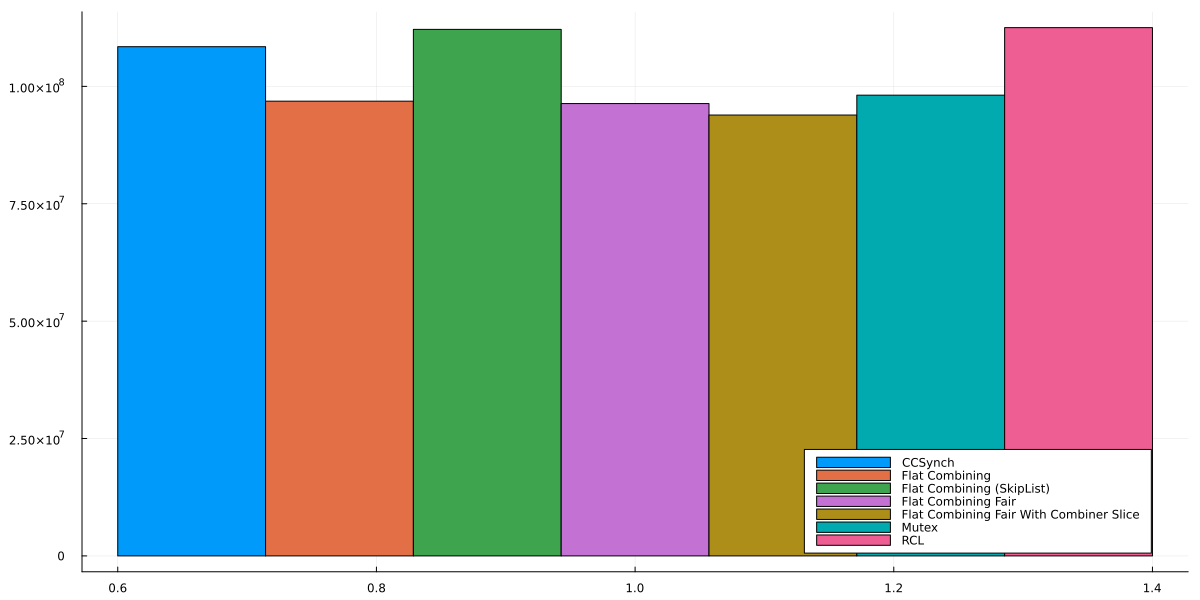

In [4]:
using Tidier

bench_all = @time @chain bench begin
    @group_by(Locktype)
    @summarize(overall_loop = sum(LoopCount))
end

@time @df bench_all groupedbar(:overall_loop, group=:Locktype, size=(1200,600))



  0.712567 seconds (760.12 k allocations: 50.089 MiB, 2.41% gc time, 99.16% compilation time)


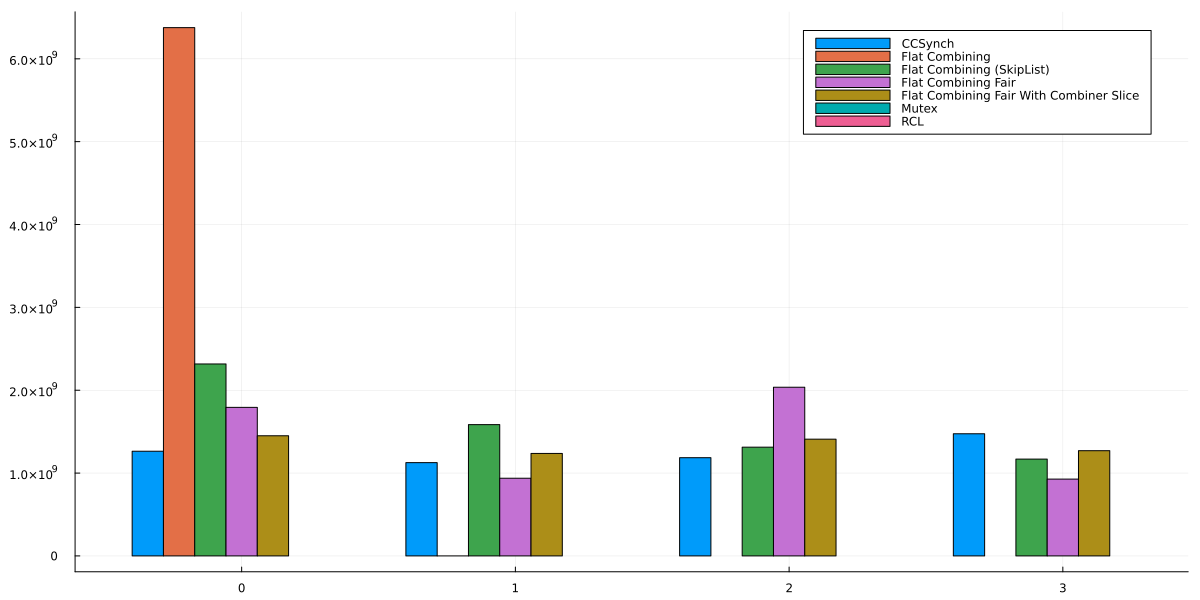

In [5]:
combiner_time_comparison = @time @df bench groupedbar(:Id, :CombineTime, group=:Locktype, size=(1200,600))
savefig("graphs/combiner_time_comparison.svg")
combiner_time_comparison
